In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from kernel_pca import KernelPCA

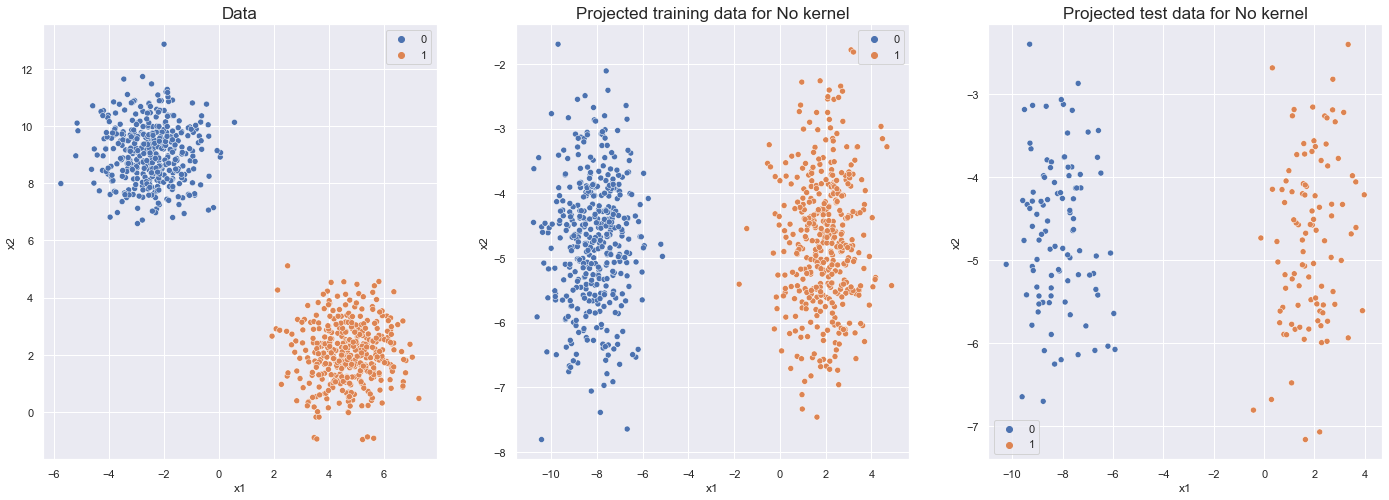

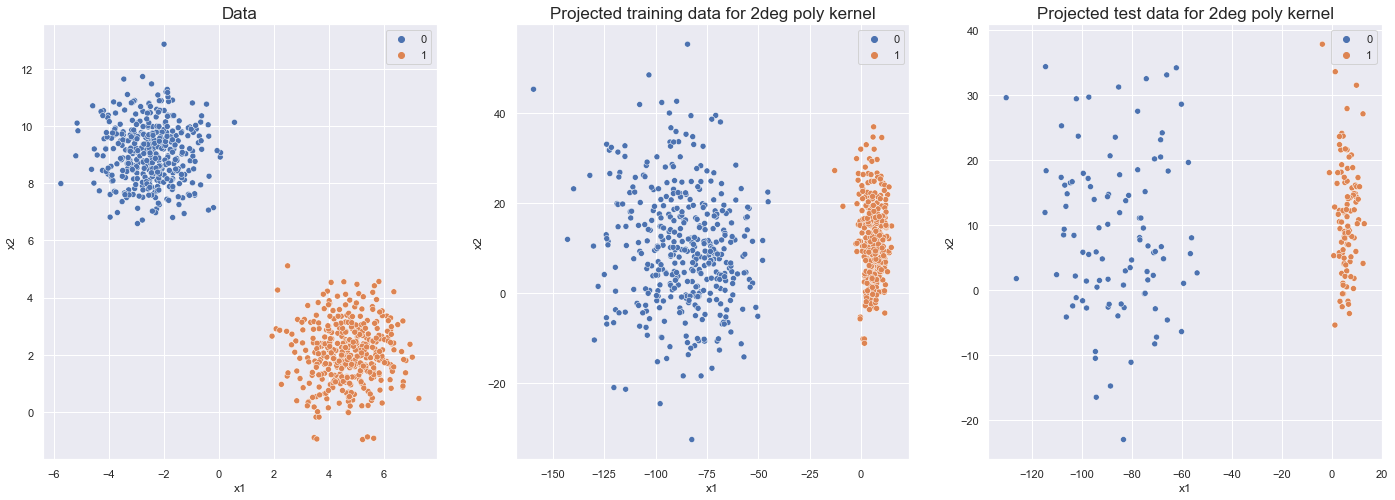

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42, centers=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

model = KernelPCA(2, kernel = 'None')
model.plot_components('No kernel', X_train, X_test, y_train, y_test)

model = KernelPCA(2, kernel = 'poly', deg=2)
model.plot_components('2deg poly kernel', X_train, X_test, y_train, y_test);

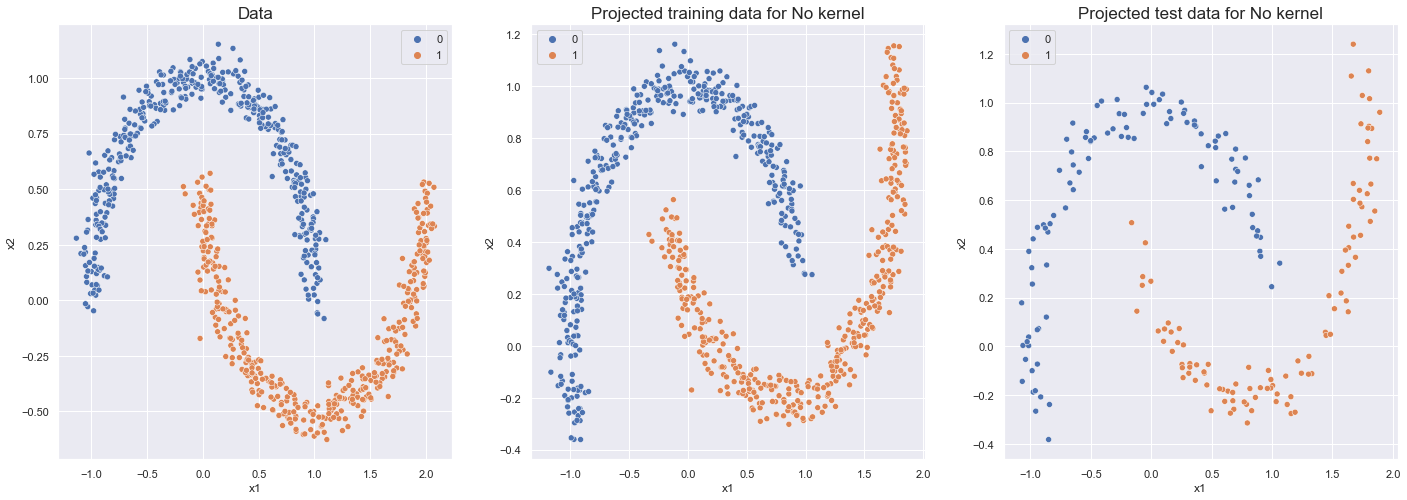

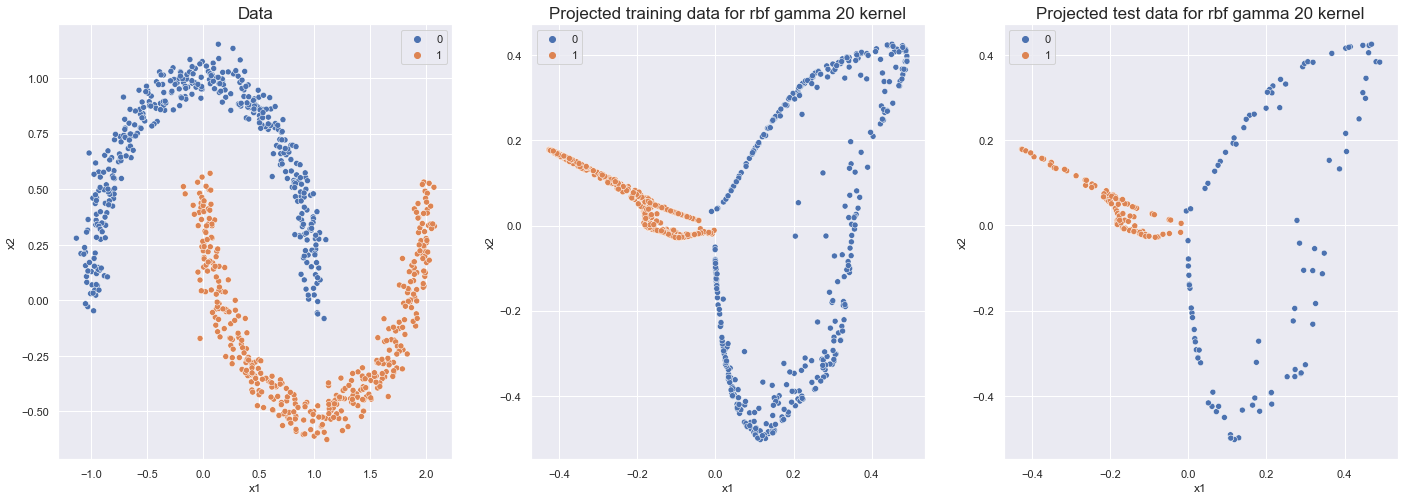

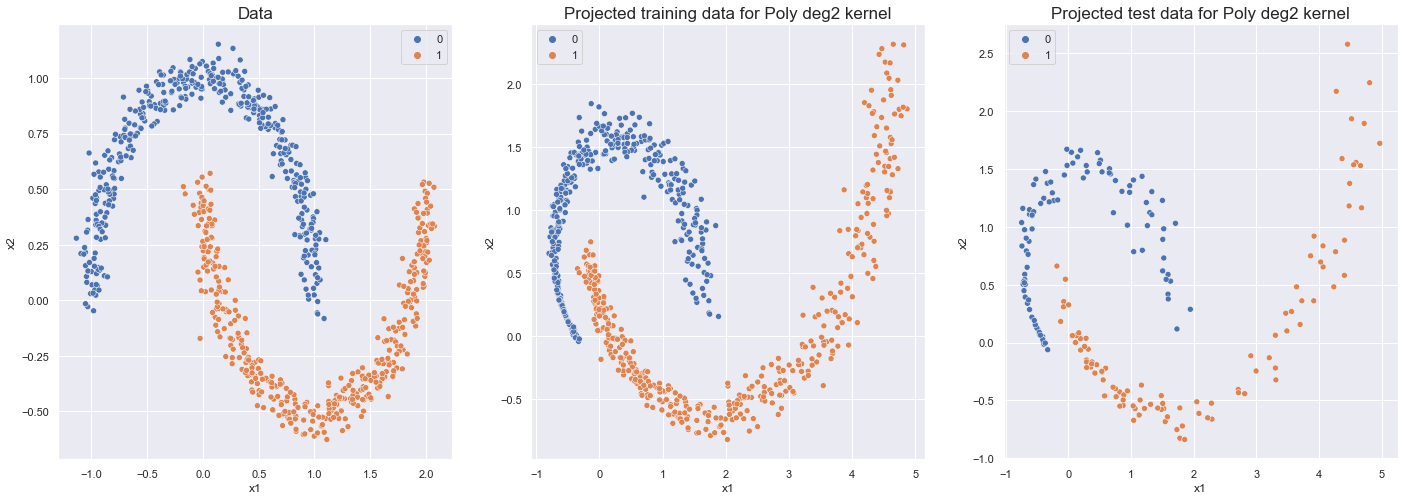

In [6]:
X, y = make_moons(n_samples=1000, random_state=123, noise=.06)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

model = KernelPCA(2, kernel = 'None')
model.plot_components('No kernel', X_train, X_test, y_train, y_test)

model = KernelPCA(2, kernel = 'rbf', gamma=20)
P_train, P_test = model.plot_components('rbf gamma 20 kernel', X_train, X_test, y_train, y_test)

model = KernelPCA(2, kernel = 'poly', deg=2)
P_train, P_test = model.plot_components('Poly deg2 kernel', X_train, X_test, y_train, y_test)

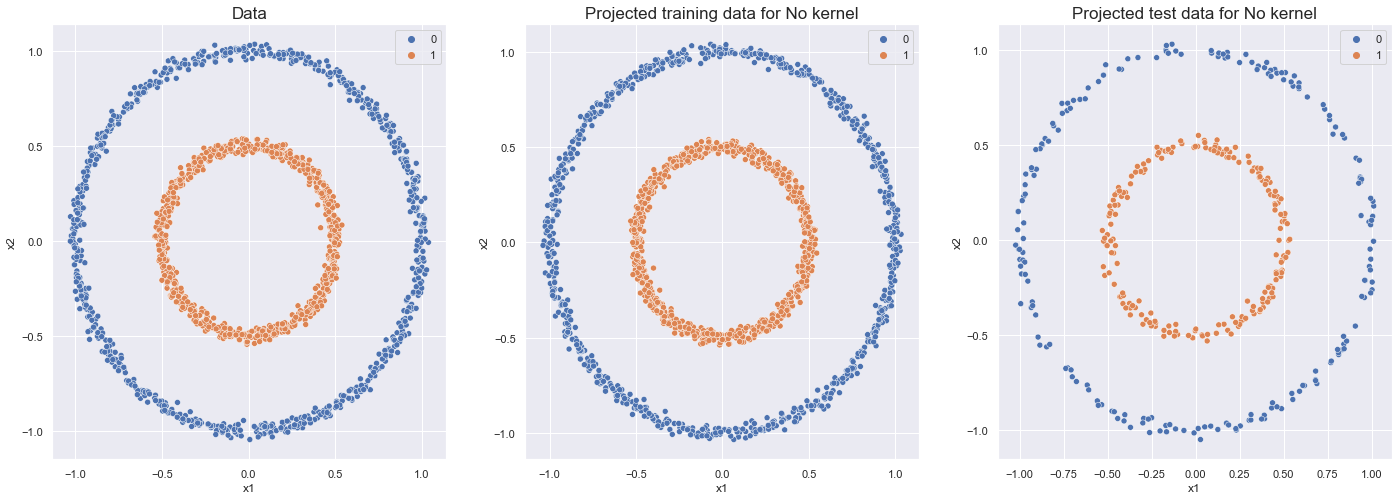

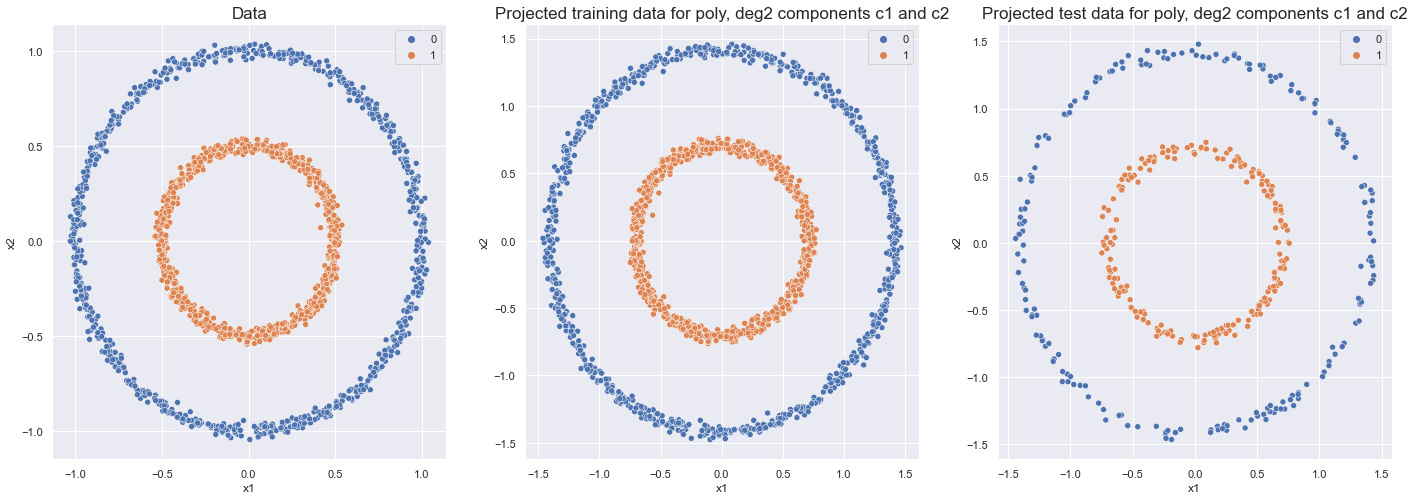

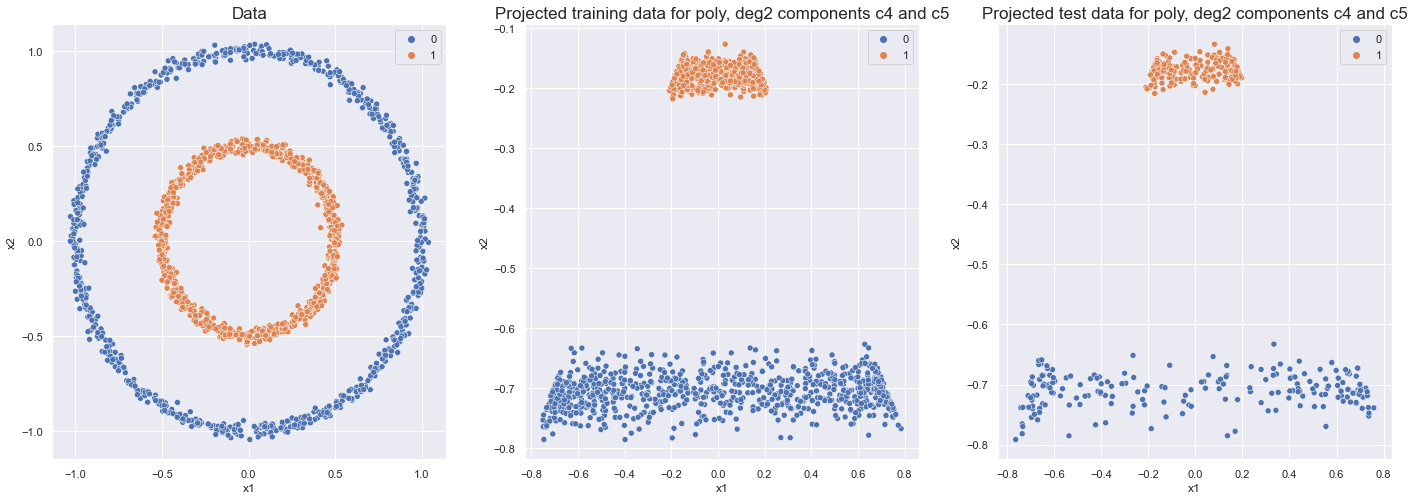

In [8]:
X, y = make_circles(n_samples=2000, random_state=123, noise=.02, factor=.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

model = KernelPCA(3, kernel='None', deg=2)
model.plot_components('No kernel', X_train, X_test, y_train, y_test)

model = KernelPCA(3, kernel='poly', deg=2)
model.plot_components('poly, deg2 components c1 and c2', X_train, X_test, y_train, y_test)

model.dim_offset = 3
model.plot_components('poly, deg2 components c4 and c5', X_train, X_test, y_train, y_test, fit=False);

### Using different number of components for logistic regression

In [5]:
frame = pd.DataFrame()
kpca = KernelPCA(2, kernel='poly', deg=2)
kpca.fit(X_train)

for dims in range(1, 8):
    kpca.dims = dims
    P_train, P_test = kpca.transform(X_train), kpca.transform(X_test)
    
    model = Pipeline([
        ('scalar', StandardScaler()),
        ('logreg', LogisticRegression())
    ])
    
    model.fit(P_train, y_train)
    train_acc = model.score(P_train, y_train)
    test_acc  = model.score(P_test,  y_test)
    frame = frame.append({'ncomponents': dims, 'train_acc': train_acc, 'test_acc':test_acc}, ignore_index=True)
frame

,ncomponents,test_acc,train_acc
0,1.0,0.4800,0.501875
1,2.0,0.4625,0.510000
2,3.0,0.4475,0.478750
3,4.0,0.4675,0.501250
4,5.0,1.0000,1.000000
5,6.0,1.0000,1.000000
6,7.0,1.0000,1.000000
